# Notebook

In this notebook, the prepared datasets from [1_Data_Prep](https://github.com/Rudinius/Bike_usage_Bremen/blob/4f39d66836e0585770c37d1cf261b0c0dd95101f/1_Data_Prep.ipynb) are loaded for imputing and preparing for ML models.

<a name="content"></a>
# Content

* [1. Import libraries](#1.)
* [2. Import processed datasets](#2.)
* [3. Adding time features](#3.)
* [4. Imputing missing and non-plausible values](#4.)
* [5. Sin and cosine transformation](#5.)
* [6. Transforming categorical features](#6.)
* [7. Export imputed dataset](#7.)


<a name="1."></a>
# 1.&nbsp;Import libraries

[Content](#content)

In [ ]:
# Import libraries
import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from ipywidgets import interact, widgets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Install package pyjanitor since it is not part of the standard packages
# of Google Colab

import importlib

# Check if package is installed
package_name = "pyjanitor"
spec = importlib.util.find_spec(package_name)
if spec is None:
    # Package is not installed, install it via pip
    !pip install pyjanitor
else:
    print(f"{package_name} is already installed")

import janitor

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<a name="2."></a>
#2.&nbsp;Import processed datasets

[Content](#content)

Next, we will import the processed dataset from [1_Data_Prep](../Bike_usage_Bremen/1_Data_Prep.ipynb).

In [ ]:
# Set base url
url = "https://raw.githubusercontent.com/Rudinius/Bike_usage_Bremen/main/data/"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Import full dataset

# We will also parse the date column as datetime64 and set it to the index column
df_full = pd.read_csv(url + "2023-08-11_processed_full.csv",
                         parse_dates=[0], index_col=[0])

# Check the correct loading of dataset
df_full.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,graf_moltke_straße_ostseite,graf_moltke_straße_westseite,hastedter_bruckenstraße,langemarckstraße_ostseite,langemarckstraße_westseite,osterdeich,radweg_kleine_weser,schwachhauser_ring,wachmannstraße_auswarts_sud,wachmannstraße_einwarts_nord,...,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,vacation,holiday
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,261.0,290.0,381.0,312.0,308.0,870.0,410.0,391,514.0,267.0,...,9.1,6.9,0.0,233.0,19.4,50.4,1001.8,0,Weihnachtsferien,Neujahr
2013-01-02,750.0,876.0,1109.0,1258.0,1120.0,2169.0,1762.0,829,1786.0,1456.0,...,7.1,1.8,0.0,246.0,20.2,40.0,1017.5,30,Weihnachtsferien,NaN
2013-01-03,931.0,1015.0,1603.0,1556.0,1480.0,2295.0,2287.0,1196,2412.0,2035.0,...,10.6,0.9,0.0,257.0,23.8,45.7,1024.5,0,Weihnachtsferien,NaN
2013-01-04,500.0,587.0,1284.0,703.0,626.0,1640.0,1548.0,1418,964.0,702.0,...,9.7,0.0,0.0,276.0,25.2,48.2,1029.5,0,Weihnachtsferien,NaN
2013-01-05,1013.0,1011.0,0.0,1856.0,1621.0,4128.0,4256.0,3075,2065.0,1377.0,...,8.6,0.1,0.0,293.0,20.2,41.0,1029.9,0,Weihnachtsferien,NaN


<a name="3."></a>
#3.&nbsp;Adding time features

[Content](#content)

We will first create a copy of the original dataset and create year, month, day and weekday columns.

In [ ]:
# Create a copy of the original data frame
df_full_fixed = df_full.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df_full_fixed["year"] = df_full_fixed.index.year
df_full_fixed["month"] = df_full_fixed.index.month
df_full_fixed["day"] = df_full_fixed.index.day
df_full_fixed["weekday"] = df_full_fixed.index.dayofweek

# Check dataframe
#df_full_fixed.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<a name="3."></a>
# 4.&nbsp;Imputing missing and non-plausible values
[Content](#content)

In the analyis so far, we have seen that many 0 values of counting stations seem to be erroneous, as they appear e.g., frequently only for a day always on the same day of month:

![alternatvie text](https://raw.githubusercontent.com/Rudinius/Bike_usage_Bremen/main/images/langemark_ost.png)

We have also seen, that sometimes the timespan is longer than just a day:

![alternatvie text](https://raw.githubusercontent.com/Rudinius/Bike_usage_Bremen/main/images/langemark_west.png)

Also there are times, where the value is not 0, but is completely missing like in the following image:

![alternatvie text](https://raw.githubusercontent.com/Rudinius/Bike_usage_Bremen/main/images/langemark_ost_2.png)

The simplest solution would be to deal with all three cases the same way and to simply use the last valid value and fill forward all missing values. This is what we will do first and then analyze the result.

We will forward fill as below:
* values between $10.0$ (inclusive)
* values greater 3 times the standard deviation above mean
* NaN values

The value $10.0$ for minimum was chosen arbitrarily. It has been shown that the $0$ values are erroneous. However it is difficult to say where the limit is which is also different for each station. As observed from the actual time series data in the last notebook, the limit value of $10$ can be seen as conservative and could probably be set even higher.



In [ ]:
# Create a mask that selects all rows with values of zeros and values greater 3 stds (less than 99,7% of values)

def impute_station(station, method="ffill", suffix="imputed_"):
    """
        Creates new column with selected suffix and imputes values of selected
        station that are below 10 (inclusive), nan, or greate 3 std
        with selected method

        Args:
            station (str): name of station
            method: one of ffil, bfill or pad

    """
    name_of_imputed_column = suffix + station

    # Calculate mean and standard diviation
    mean = np.mean(df_full_fixed[station])
    std = np.std(df_full_fixed[station])

    # Create new column for imputed values
    df_full_fixed[name_of_imputed_column] = df_full_fixed[station]

    # Create mask to fitler aus values greater than 3 std
    mask = (df_full_fixed[name_of_imputed_column] > (mean+3*std))

    # Set the masked values to np.nan and forward fill all np.nan and zero values
    df_full_fixed.loc[mask, name_of_imputed_column] = np.nan

    # Create the range of values to be replaced
    # all nan values as well as values below 10 (inclusive)
    values_to_replace = np.arange(-1.0, 11.0)
    values_to_replace[0] = np.nan

    df_full_fixed[name_of_imputed_column].replace(values_to_replace, method=method, inplace=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Imputing every station in the in the dataframe
for station in df_full_fixed.columns[:12]:

    station = station
    imputed_station = "imputed_" + station

    impute_station(station)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Next, we impute the missing weather data. As shown in the EDA step, `wdir` and `wpgt` have neglectable missing values and the values for `snow` are likely to be $0$. Therefore we will impute with forward fill strategy for `wdir` and `wpgt` and set missing `snow` values to $0$.

In [ ]:
df_full_fixed["imputed_wdir"] = df_full_fixed["wdir"].fillna(method="ffill", inplace=False)
df_full_fixed["imputed_wpgt"] = df_full_fixed["wpgt"].fillna(method="ffill", inplace=False)
df_full_fixed["imputed_snow"] = df_full_fixed["snow"].replace(np.nan, 0.0, inplace=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The output shows, that all new columns have been created and that all missing values have been imputed.

In the following we can check how this imputing strategy looks in detail for different features and also for the non missing values like values below $10.0$ (inclusive) and big outliers.

In [ ]:
def plot_time_series_pair_imputed(df):
    """
    Funtion plots a feature of the dataset with imputed values as overlay

    Args:
        df (pandas.DataFrame): the dataset
    """

    def plot_time_series_pair_imputed(feature):

        feature = feature
        imputed_feature = "imputed_" + feature

        # Calculate difference between original and imputed feature for plotting
        diff = (df[feature] != df[imputed_feature])

        fig = px.line()

        fig.add_scatter(
            x=df.index,
            y=df[feature],
            mode="lines",
            line=dict(color="blue"),
            name="original"
            )

        fig.add_scatter(
            x=df.loc[diff, imputed_feature].index,
            y=df.loc[diff, imputed_feature],
            mode="markers",
            line=dict(color="red"),
            name="imputed"
            )

        # Set layout
        fig.update_layout(
            title=f"Plotting imputed values for '{feature}'",
            width=1500,
            xaxis=dict(
                title="Date"
                ),
            legend=dict(
                yanchor="top",
                y=0.99,
                xanchor="right",
                x=0.99
                ),
            )
        fig.show()

    # Only imputed values are selectable
    options = np.append(df.columns[:12].values, ["wdir", "wpgt", "snow"])

    select_feature = widgets.Dropdown(
            options=options,
            description='Station:',
            layout={"width": "550px"},
            disabled=False,
            )

    plot_time_series_pair_imputed("wpgt")
    interact(plot_time_series_pair_imputed, feature=select_feature)

plot_time_series_pair_imputed(df_full_fixed)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/traitlets/traitlets.py:711: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.



interactive(children=(Dropdown(description='Station:', layout=Layout(width='550px'), options=('graf_moltke_str…

The values have all been imputed correctly according to the aforementioned criteria.

<a name="5."></a>
# 5.&nbsp;Sin and cosine transformation
[Content](#content)

As shown in the last notebook, the data has periodic elements e.g., for week, month and year. Therefore we will add sin and cosine encoded date columns, now that all missing values or outliers have been taken care off.

Additionally we encode `wdir` the same way, since it is an measurement of wind angle (in °).

In [ ]:
df_full_fixed['week_sin'] = np.sin(2 * np.pi * df_full_fixed.index.dayofweek / 7)
df_full_fixed['week_cos'] = np.cos(2 * np.pi * df_full_fixed.index.dayofweek / 7)

df_full_fixed['month_sin'] = np.sin(2 * np.pi * df_full_fixed.index.day / 31)
df_full_fixed['month_cos'] = np.cos(2 * np.pi * df_full_fixed.index.day / 31)

df_full_fixed['year_sin'] = np.sin(2 * np.pi * df_full_fixed.index.dayofyear / 365)
df_full_fixed['year_cos'] = np.cos(2 * np.pi * df_full_fixed.index.dayofyear / 365)

df_full_fixed['wdir_sin'] = np.sin(2 * np.pi * df_full_fixed["wdir"] / 359) # wind direction ranging from 0 - 359°
df_full_fixed['wdir_cos'] = np.cos(2 * np.pi * df_full_fixed["wdir"] / 359) # wind direction ranging from 0 - 359°

#df_full_fixed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# Uncomment for plotting transformed features
"""
plt.plot(np.array(df_full_fixed['week_sin'])[:8], linestyle='-', marker='o')
plt.plot(np.array(df_full_fixed['week_cos'])[:8], linestyle='-', marker='o')
plt.xlabel('Time [day]')

df_full_fixed[0:8].plot.scatter('week_sin', "week_cos").set_aspect('equal')
"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'\nplt.plot(np.array(df_full_fixed[\'week_sin\'])[:8], linestyle=\'-\', marker=\'o\')\nplt.plot(np.array(df_full_fixed[\'week_cos\'])[:8], linestyle=\'-\', marker=\'o\')\nplt.xlabel(\'Time [day]\')\n\ndf_full_fixed[0:8].plot.scatter(\'week_sin\', "week_cos").set_aspect(\'equal\')\n'

In [ ]:
# Uncomment for plotting transformed features
"""
plt.plot(np.array(df_full_fixed['month_sin'])[:32], linestyle='-', marker='o')
plt.plot(np.array(df_full_fixed['month_cos'])[:32], linestyle='-', marker='o')
plt.xlabel('Time [day]')

df_full_fixed[0:31].plot.scatter('month_sin', "month_cos").set_aspect('equal')
"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'\nplt.plot(np.array(df_full_fixed[\'month_sin\'])[:32], linestyle=\'-\', marker=\'o\')\nplt.plot(np.array(df_full_fixed[\'month_cos\'])[:32], linestyle=\'-\', marker=\'o\')\nplt.xlabel(\'Time [day]\')\n\ndf_full_fixed[0:31].plot.scatter(\'month_sin\', "month_cos").set_aspect(\'equal\')\n'

In [ ]:
# Uncomment for plotting transformed features
"""
plt.plot(np.array(df_full_fixed['year_sin'])[:366])
plt.plot(np.array(df_full_fixed['year_cos'])[:366])
plt.xlabel('Time [day]')

df_full_fixed[0:366].plot.scatter('year_sin', "year_cos").set_aspect('equal')
"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'\nplt.plot(np.array(df_full_fixed[\'year_sin\'])[:366])\nplt.plot(np.array(df_full_fixed[\'year_cos\'])[:366])\nplt.xlabel(\'Time [day]\')\n\ndf_full_fixed[0:366].plot.scatter(\'year_sin\', "year_cos").set_aspect(\'equal\')\n'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



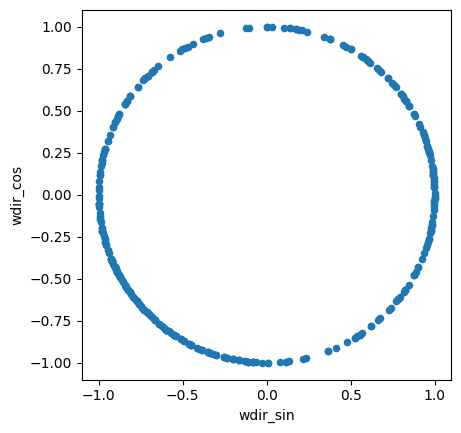

In [ ]:
df_full_fixed[0:360].plot.scatter('wdir_sin', "wdir_cos").set_aspect('equal')

In [ ]:
# utils function
def decode_sin_cos(sin, cos):
    """
    Function to decode prior sin and consine encoded values

    Args:
        sin: encoded sin value
        cos: encoded cos value

    Return:
        degree: value in degrees (0 - 360)
    """

    angle = np.arctan2(sin, cos)
    if angle > 0:
        angle = angle * 360 / (2*np.pi)
    else:
        angle = (2*np.pi + angle) * 360 / (2*np.pi)

    return angle


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Apart from making `wdir` easier to interpret for a ML model, the transformation also shows the distribution of values. Here the main wind directions are around 90° and between 180° and 270°.

<a name="6."></a>
# 6.&nbsp;Transforming categorical features
[Content](#content)

We need to transform the columns `holiday` and `vacation` using `One-Hot-Encoding` and masking to change the categorical columns to numerical columns.

We will use `One-Hot-Encoding` for the `holiday` feature. We will use masking (replacing) for the `vacation` feature and thus only having one column for `vacation` with 1 for vacation and 0 for no vcation.

The reason for keeping only this reduced information on `vacation` has been discussed in the EDA step and is due to the similarity of the different vacations to each other and therefore distinguishing between different vacations might not add additional benefits (but could be tested nevertheless).

In [ ]:
# Use One Hot Encoder only for encoding holiday feature
OH_encoder = OneHotEncoder()

# Create OHencoding
transformed_array = OH_encoder.fit_transform(df_full_fixed[["holiday"]]).toarray()

# Create temporary dataframe and concat with existing dataframe
df_temp = pd.DataFrame(transformed_array, index=df_full_fixed.index, columns=OH_encoder.get_feature_names_out()).drop(["holiday_nan"], axis=1).clean_names(strip_underscores="both")
df_full_fixed = pd.concat([df_full_fixed, df_temp], axis=1)

# Transform `vacation` feature
# Set the values to `0` or `1` according to mask
df_full_fixed["transformed_vacation"] = df_full_fixed["vacation"]

# Create a mask for vacation or no vacation
mask = df_full_fixed["transformed_vacation"].isna()

df_full_fixed.loc[mask, "transformed_vacation"] = 0
df_full_fixed.loc[np.invert(mask), "transformed_vacation"] = 1

df_full_fixed["transformed_vacation"] = df_full_fixed["transformed_vacation"].astype('int32')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<a name="7."></a>
# 7.&nbsp;Export imputed dataset
[Content](#content)

In this final step, we export the created dataset `df_full_fixed` to train a model in the next notebook.

In [ ]:
df_full_fixed.describe().transpose()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,count,mean,std,min,25%,50%,75%,max
graf_moltke_straße_ostseite,3622.0,1092.194644,344.420497,13.000000,853.000000,1.125500e+03,1344.750000,1918.000000
graf_moltke_straße_westseite,3576.0,1192.361857,400.569407,0.000000,916.000000,1.224000e+03,1479.000000,2136.000000
hastedter_bruckenstraße,3636.0,2658.326458,1351.346180,0.000000,1683.750000,2.534000e+03,3548.500000,8284.000000
langemarckstraße_ostseite,3639.0,2060.682056,852.346342,0.000000,1438.500000,2.074000e+03,2683.000000,5906.000000
langemarckstraße_westseite,3651.0,1921.012051,1020.229339,0.000000,1305.000000,1.921000e+03,2477.500000,22263.000000
osterdeich,3651.0,3451.826349,1311.526378,0.000000,2585.000000,3.505000e+03,4301.500000,7302.000000
radweg_kleine_weser,3550.0,3371.632676,1504.956116,82.000000,2331.000000,3.324500e+03,4314.750000,8845.000000
schwachhauser_ring,3652.0,1691.392114,703.791832,0.000000,1183.000000,1.656500e+03,2195.000000,3834.000000
wachmannstraße_auswarts_sud,3561.0,2807.644201,1153.944956,173.000000,1913.000000,2.905000e+03,3646.000000,8031.000000
wachmannstraße_einwarts_nord,3474.0,2179.684226,989.454595,0.000000,1390.500000,2.299000e+03,2949.500000,4917.000000


In [ ]:
date = datetime.date.today()

path = "./data/training/"

# Save the new dataset to csv and download the file
file_name = path + f"{date}" + "_processed_" + "df.csv"
df_full.to_csv(file_name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>